In [2]:
!pip install filterpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=59188456503187086996ee3579df2608e1edf2b14c9964f9126da71cc621fae6
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy


In [2]:
import math

from math import sin, cos, atan2, sqrt
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, TimeSeriesSplit
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [3]:
df = pd.read_csv("/kaggle/input/th3-ts/th2.csv")

In [4]:
data = df.iloc[:,[0,11]]
data.columns = ['date', 'value']

In [5]:
data.head(15)

,date,value
0,1/1/2021,964.4
1,2/1/2021,1019.7
2,3/1/2021,988.4
3,4/1/2021,1010.8
4,5/1/2021,1061.5
5,6/1/2021,1061.5
6,7/1/2021,1061.5
7,8/1/2021,1061.5
8,9/1/2021,1064.1
9,10/1/2021,966.7


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    365 non-null    object 
 1   value   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [7]:
print(data.isnull().sum())


date     0
value    0
dtype: int64


In [8]:
data.describe()

,value
count,365.000000
mean,1040.311233
std,105.147265
min,885.700000
25%,988.400000
50%,1022.600000
75%,1061.500000
max,1565.500000


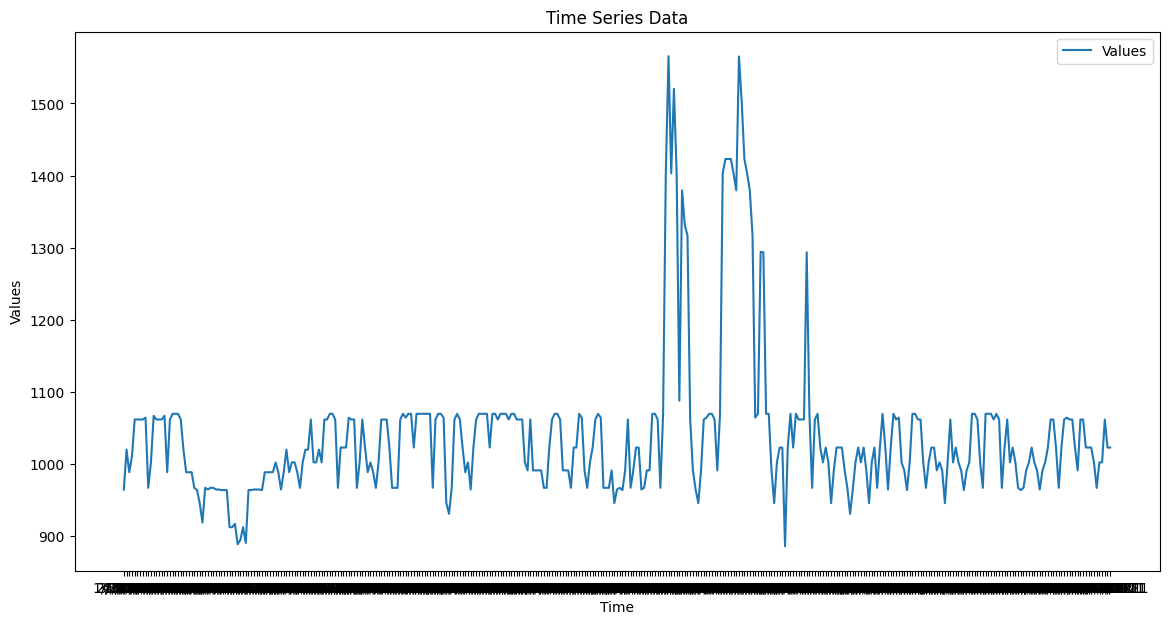

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.plot(data['date'], data['value'], label='Values')

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series Data')
plt.legend()
plt.show()


In [16]:
import numpy as np
from hmmlearn import hmm

# Giả sử số lượng trạng thái ẩn là 3
n_components = 3

# Tạo một mô hình Gaussian HMM
model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=1000)

# Chuẩn bị dữ liệu
# hmmlearn yêu cầu dữ liệu input là mảng 2 chiều (samples, features)
values = data['value'].values.reshape(-1, 1)

# Huấn luyện mô hình
model.fit(values)

# Để dự đoán các trạng thái ẩn:
hidden_states = model.predict(values)

# Để xem xác suất của từng trạng thái:
probabilities = model.predict_proba(values)


In [17]:
hidden_states

array([2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,

In [18]:
probabilities

array([[4.92349686e-04, 5.93306385e-59, 9.99507650e-01],
       [9.98772331e-01, 7.20780906e-10, 1.22766869e-03],
       [5.68031639e-01, 5.54572410e-09, 4.31968355e-01],
       ...,
       [7.34381240e-01, 3.91049413e-07, 2.65618369e-01],
       [6.94690978e-01, 2.87304019e-08, 3.05308993e-01],
       [7.17073967e-01, 1.26914583e-07, 2.82925906e-01]])

In [22]:
# Giả sử `data['date']` đã được chuyển đổi đúng định dạng
dates = pd.to_datetime(data['date'], format='%d/%m/%Y')
last_date = dates.iloc[-1]

# Lấy trạng thái ẩn cuối cùng từ mô hình HMM
last_state = hidden_states[-1]


In [23]:
# Khởi tạo danh sách để lưu trữ dự đoán và ngày
predicted_values = []
predicted_dates = []

# Dự đoán cho 7 ngày tiếp theo
for i in range(1, 8):
    next_date = last_date + pd.Timedelta(days=i)
    predicted_dates.append(next_date)
    
    # Giả định mô hình chuyển trạng thái và dự đoán giá trị mới
    next_state_prob = model.transmat_[last_state]
    next_state = np.random.choice(np.arange(model.n_components), p=next_state_prob)
    
    # Dự đoán giá trị dựa trên phân phối của trạng thái mới
    next_value_mean = model.means_[next_state]
    next_value_variance = np.diag(model.covars_[next_state])
    next_value = np.random.normal(next_value_mean, np.sqrt(next_value_variance))
    predicted_values.append(next_value[0])
    
    # Cập nhật trạng thái cuối cùng
    last_state = next_state

# Chuyển danh sách sang DataFrame
forecast_df = pd.DataFrame({
    'date': predicted_dates,
    'predicted_value': predicted_values
})


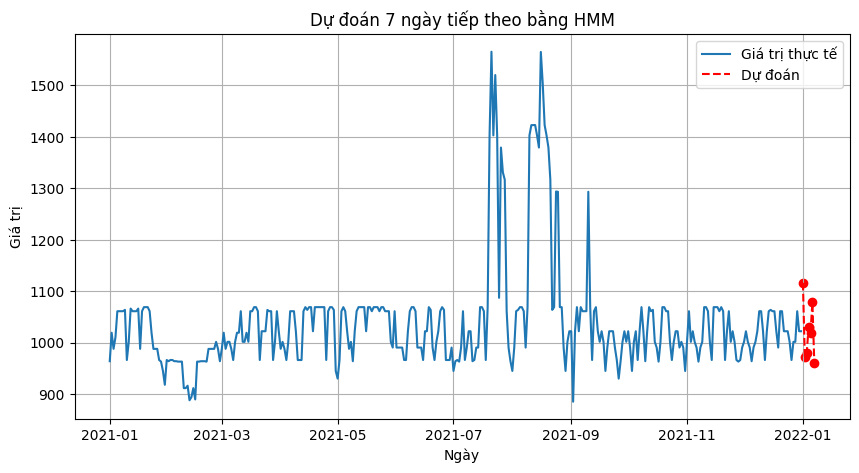

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(dates, data['value'], label='Giá trị thực tế')
plt.plot(forecast_df['date'], forecast_df['predicted_value'], 'r--', label='Dự đoán')
plt.scatter(forecast_df['date'], forecast_df['predicted_value'], color='red')
plt.legend()
plt.title('Dự đoán 7 ngày tiếp theo bằng HMM')
plt.xlabel('Ngày')
plt.ylabel('Giá trị')
plt.grid(True)
plt.show()
